# Demand Forecast for e-scooter business

<ol>
    <li><h4>Understanding data</h4></li>
    <li><h4>Data Summary</h4></li>
    <li><h4>Exploratory data analysis (EDA) & Feature engineering</h4></li>
   <li><h4>Feature Scaling  </h4></li>
   <li><h4>ML Algorithm </h4>
       </ol>
   

<h2> Understanding data</h2>
<p>The given train dataset has 3000000 rows and 16 columns.</p>

<h6>Columns description:</h6>

<ul>
    <h6>Independent Variables (Features) </h6><p></p>
    <li> ID : A unique ID for each trip. This is an arbitrary sequence and is not derived from any identifier used by the service provider. </li>
    <li> Device ID : A unique ID for the device used to complete the trip. This is an arbitrary sequence and is not derived from any identifier used by the service provider. </li>
    <li> Vehicle Type : Vehicle type (bicycle or scooter)</li>
    <li> Trip Duration : Trip duration, in seconds</li>
    <li> Trip Distance : Trip distance, in meters </li>
    <li> Start Time : The datetime at which the trip started, in local time (US/Central)</li>
    <li> End Time : The datetime at which the trip ended, in local time (US/Central)</li>
    <li> Modified Date : The datetime at which the record was last modified (typically the date the data was extracted/loaded from the data provider), in local time (US/Central)</li>
    <li> Month : The month # the trip occurred, in local time (US/Central), where 1 = January, etc.</li>
    <li>Hour: The hour of the day during which trip occurred, in local time (US/Central)</li>
    <li> Day of Week : The day of the week on which the trip occurred, in local time (US/Central), where Sunday = 0, and so on.</li>
    <li> Council District (Start) : The council district in which the trip started.</li>
    <li> Council District (End) : The council district in which the trip ended.</li>
    <li> Year </li>
    <li> Census Tract Start : The GEOID of the 2010 US Census Tract in which the trip originated.</li>
    <li> Census Tract End : The GEOID of the 2010 US Census Tract in which the trip ended. </li>
</ul>


In [1]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import calendar

from sklearn.metrics import explained_variance_score


%matplotlib inline
sns.set()

<h2>Data Summary</h2>

In [2]:
# import the dataset
df = pd.read_csv("SMV.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,04/18/2020 05:15:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:34 AM,4,5,5,9,4,2020,48453001100,48453001806
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,04/18/2020 05:30:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:33 AM,4,5,5,3,3,2020,48453000902,48453000902
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,04/18/2020 05:15:00 AM,04/18/2020 05:30:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,1,2020,48453000304,48453002105
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,04/18/2020 05:15:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,5,5,2020,48453001901,48453001901
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,04/18/2020 05:00:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,9,2020,48453000601,48453000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,84c61dcc-adc4-4280-9504-ae31a1083ae4,e50c01bb-303c-4572-9a39-3ea5fb71d052,scooter,1908,2838.0,12/25/2018 10:15:00 PM,12/25/2018 10:45:00 PM,04/17/2019 01:51:08 AM,12,22,2,9,9,2018,48453001100,48453001100
2999996,d6c8d236-b514-46e3-9bfa-a5231e3b7910,46345242-61f4-4fb8-b422-666853fa685b,scooter,252,755.0,12/13/2018 01:15:00 PM,12/13/2018 01:15:00 PM,04/17/2019 01:33:16 AM,12,13,4,1,9,2018,48453000401,48453000601
2999997,43fb2b4e-c5e5-4ac3-9faf-be1f2b311983,cdf821c2-5f61-4cd2-84f0-51094f4da457,scooter,444,1409.0,12/13/2018 01:15:00 PM,12/13/2018 01:30:00 PM,04/17/2019 01:33:16 AM,12,13,4,9,9,2018,48453000601,48453000603
2999998,3bf90851-865a-4f3a-9567-401bf1144cae,55d3fe5c-e8c5-4600-b18d-9dab28f0de2e,scooter,332,1027.0,12/13/2018 01:15:00 PM,12/13/2018 01:30:00 PM,04/17/2019 01:33:16 AM,12,13,4,9,9,2018,48453000603,48453000601


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   Device ID                 object 
 2   Vehicle Type              object 
 3   Trip Duration             int64  
 4   Trip Distance             float64
 5   Start Time                object 
 6   End Time                  object 
 7   Modified Date             object 
 8   Month                     int64  
 9   Hour                      int64  
 10  Day of Week               int64  
 11  Council District (Start)  object 
 12  Council District (End)    object 
 13  Year                      int64  
 14  Census Tract Start        object 
 15  Census Tract End          object 
dtypes: float64(1), int64(5), object(10)
memory usage: 366.2+ MB


In [5]:
df.describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Year
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,7.444948e+02,6.126216e+04,9.065516e+00,1.364930e+01,3.356447e+00,2.018568e+03
std,7.130406e+03,9.590421e+06,1.929927e+00,5.838387e+00,2.060620e+00,8.948883e-01
min,-8.616100e+04,-1.666931e+07,1.000000e+00,0.000000e+00,0.000000e+00,2.018000e+03
25%,2.330000e+02,3.150000e+02,8.000000e+00,1.100000e+01,2.000000e+00,2.018000e+03
50%,4.230000e+02,9.500000e+02,9.000000e+00,1.500000e+01,4.000000e+00,2.018000e+03
75%,8.450000e+02,1.979000e+03,1.000000e+01,1.800000e+01,5.000000e+00,2.020000e+03
max,1.149160e+07,2.147484e+09,1.200000e+01,2.300000e+01,6.000000e+00,2.020000e+03


<p class="alert alert-block alert-success"> There are negative values in trip duration and trip distance, so will consider it as noisy data

<h2>Exploratory data analysis (EDA) & Feature engineering</h2>

<AxesSubplot:>

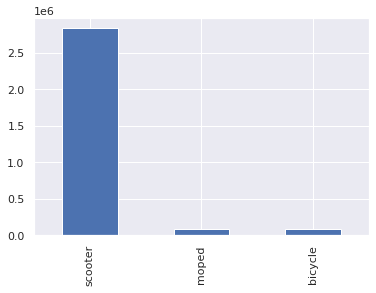

In [6]:
df['Vehicle Type'].value_counts().plot.bar()

<p class="alert alert-block alert-success">Due to our project interest in the e-scooter business, the other types will not take into consideration(will delete the other type)

In [7]:
# delete type mode and bycle
df = df[(df['Vehicle Type'] == 'scooter')]
df['Vehicle Type'].value_counts()

scooter    2837679
Name: Vehicle Type, dtype: int64

In [8]:
df[df['Council District (Start)']== "None"]

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
144204,047c4ca4-c4eb-4784-9553-1baa3ef8f3e9,7e7e27d3-78c7-44f1-9812-460dc97baa2d,scooter,321,1479.0,09/03/2020 07:30:00 PM,09/03/2020 07:30:00 PM,09/04/2020 10:15:51 PM,9,19,3,None,8,2020,48453001910,48453001911
145157,70c90d95-6445-4699-ab48-d0117c40e1e8,b2d2221d-2237-4fbd-9094-45a18c58c585,scooter,2426,103.0,09/24/2020 01:15:00 AM,09/24/2020 02:00:00 AM,09/25/2020 04:16:56 AM,9,2,3,None,None,2020,48453001842,48453001842
149848,20c903f8-6f55-4347-badc-fedd7760abb0,cd460184-8567-4e47-8ee5-cfec39713799,scooter,2165,0.0,10/26/2020 06:45:00 PM,10/26/2020 07:30:00 PM,10/27/2020 10:16:22 PM,10,19,0,None,None,2020,None,None
151340,6ccec199-4233-49aa-ba65-dbe0617c14ab,91e470db-ba3c-4a3d-9412-9d37b2a2285e,scooter,1301,68731.0,10/03/2020 02:00:00 AM,10/03/2020 02:30:00 AM,10/04/2020 05:16:28 AM,10,2,5,None,9,2020,None,48453001200
155321,1c8e5e24-65c5-49d1-9a2e-ca4f45e24ff6,dc6ddcbc-249d-4c44-a40f-138893bd7a6f,scooter,2576,45911.0,08/18/2020 04:45:00 AM,08/18/2020 05:15:00 AM,08/19/2020 08:15:56 AM,8,5,1,None,9,2020,None,48453001200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857890,b40a8fff-9a7b-4c57-9ef6-c2595568dd81,7e27f3e1-31ed-4fba-b244-1e075f9699e2,scooter,2917,177.0,09/23/2020 07:15:00 PM,09/23/2020 08:00:00 PM,09/24/2020 11:17:53 PM,9,20,2,None,None,2020,None,None
1858007,be87f2ea-9684-4dd4-a1f0-51090a5ee368,7e27f3e1-31ed-4fba-b244-1e075f9699e2,scooter,262,37.0,09/23/2020 09:15:00 PM,09/23/2020 09:15:00 PM,09/25/2020 12:16:36 AM,9,21,2,None,None,2020,None,None
1858375,94d01bb6-1c97-41a2-a907-1f95af991138,fe30a77b-3be6-4d03-aaf2-056c046b572c,scooter,287,1465.0,09/23/2020 10:45:00 PM,09/23/2020 10:45:00 PM,09/25/2020 01:16:46 AM,9,22,2,None,8,2020,48453001919,48453001911
2070099,f4b0e32f-b5f7-4df3-81fd-cfbc002d0c96,6d85b7f6-21be-45db-9d68-114640d5d81f,scooter,2541,0.0,10/17/2020 01:00:00 AM,10/17/2020 01:45:00 AM,10/18/2020 04:17:16 AM,10,1,5,None,None,2020,None,None


<p class="alert alert-block alert-success">The Council District (Start and End) labeled by numbers from 0 to 10. We want to be sure that the 0 label is not mean missing values, so we check if there is None value's that describe the missing and we found None values. This mean 0 label in not missing value, it's express the  Council District

In [9]:
df = df.replace(to_replace='None', value=np.nan).dropna()

In [10]:
df.isnull().sum().sum()

0

<p class="alert alert-block alert-success">Here we drop all none values

In [11]:
df['Council District (Start)'].unique()

array([9, 3, 5, 1, 4, 7, 8, 0, 10, 2, '1', '9', '3', '5', '7', '0', '8',
       '10', '2', '4', '6', 6], dtype=object)

In [12]:
df['Council District (Start)'] = df['Council District (Start)'].astype(int)
df['Council District (End)'] = df['Council District (End)'].astype(int)

<p class="alert alert-block alert-success"> The Council District (Start) label as int and sting, so we convert the string label to int

In [13]:
df = df[df['Trip Duration'] > 0]
df = df[df['Trip Distance'] > 0]

<p class="alert alert-block alert-success"> When we described the data  we noticed that there is a negative values in trip duration and distance, so we will remove it

/home/qamar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


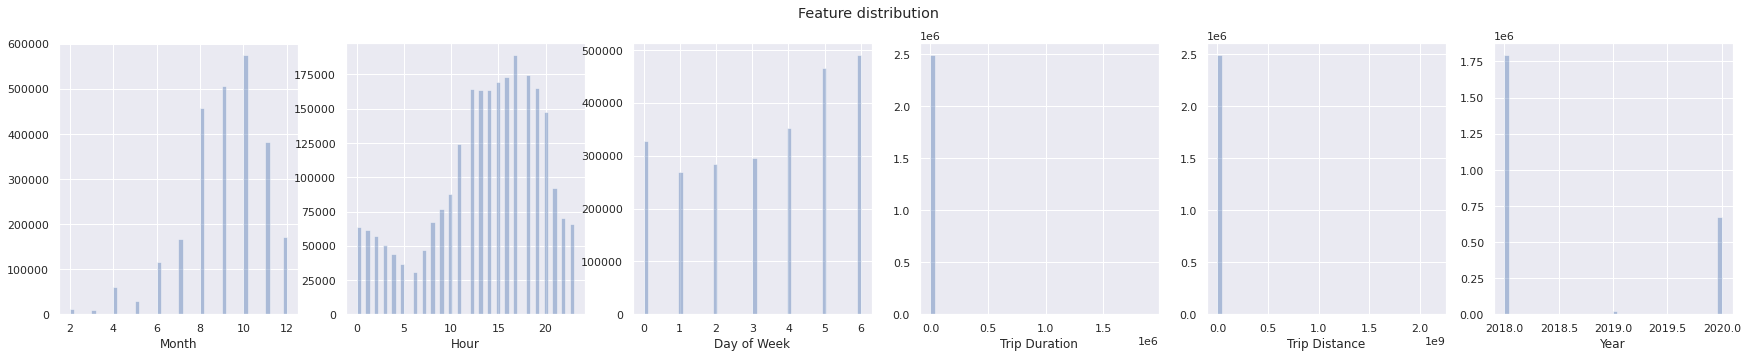

In [14]:
def plot_distribution(df,**kwargs ):
    columns = ['Month', 'Hour', 'Day of Week', 'Trip Duration', 'Trip Distance',
       'Year']
    fig, axes = plt.subplots(ncols=len(columns),figsize=(30,5))
    for axs, col in zip(axes, columns):
        sns.distplot(df[col], ax=axs,**kwargs)
        fig.suptitle('Feature distribution')
    
plot_distribution(df, kde=False)

<AxesSubplot:>

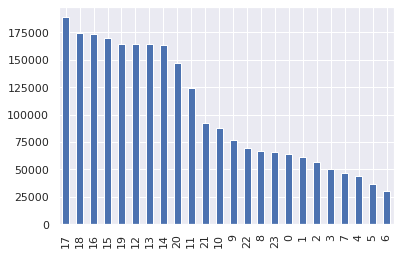

In [15]:
df['Hour'].value_counts().plot.bar()

<p class="alert alert-block alert-success">People prefer renting scooter after 12PM

In [16]:
df['is_peak time'] = np.where((df['Hour'] > 11) | (df['Hour'] < 20) ,1, 0)

<p class="alert alert-block alert-success"> We want to extract a new feature which is peak time. If the customer rent the scooter in peak time or not 

<AxesSubplot:>

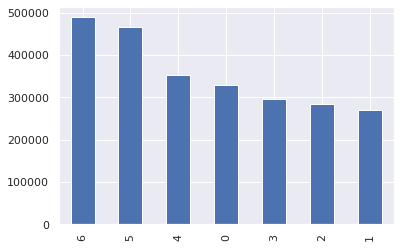

In [17]:
df['Day of Week'].value_counts().plot.bar()

<p class="alert alert-block alert-success"> The demand for scooter increases on holidays

In [18]:
df['is_holiday'] = np.where((df['Day of Week'] == 5) | (df['Day of Week'] == 6) ,1, 0)

<p class="alert alert-block alert-success"> We extract a new feature which is is_holiday. If the customer rent the scooter on holiday time or not

<AxesSubplot:>

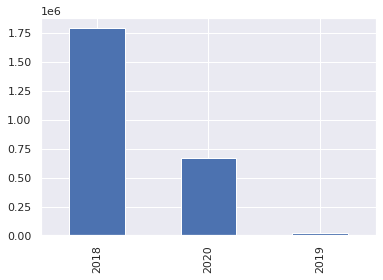

In [19]:
df['Year'].value_counts().plot.bar()

<p class="alert alert-block alert-success"> We have outliers in the data on 2019, will delete it 

In [20]:
df.drop(df.loc[df['Year']==2019].index, inplace=True)

<h4>Now, we want to extract the target variable which is the demand by grouping the data using this feature (Year,Month,Hour,Council District (Start),is_holiday,Day of Week,is_peak time)</h4>

In [21]:
df

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,is_peak time,is_holiday
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,04/18/2020 05:15:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:34 AM,4,5,5,9,4,2020,48453001100,48453001806,1,1
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,04/18/2020 05:30:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:33 AM,4,5,5,3,3,2020,48453000902,48453000902,1,1
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,04/18/2020 05:15:00 AM,04/18/2020 05:30:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,1,2020,48453000304,48453002105,1,1
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,04/18/2020 05:15:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,5,5,2020,48453001901,48453001901,1,1
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,04/18/2020 05:00:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,9,2020,48453000601,48453000304,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,84c61dcc-adc4-4280-9504-ae31a1083ae4,e50c01bb-303c-4572-9a39-3ea5fb71d052,scooter,1908,2838.0,12/25/2018 10:15:00 PM,12/25/2018 10:45:00 PM,04/17/2019 01:51:08 AM,12,22,2,9,9,2018,48453001100,48453001100,1,0
2999996,d6c8d236-b514-46e3-9bfa-a5231e3b7910,46345242-61f4-4fb8-b422-666853fa685b,scooter,252,755.0,12/13/2018 01:15:00 PM,12/13/2018 01:15:00 PM,04/17/2019 01:33:16 AM,12,13,4,1,9,2018,48453000401,48453000601,1,0
2999997,43fb2b4e-c5e5-4ac3-9faf-be1f2b311983,cdf821c2-5f61-4cd2-84f0-51094f4da457,scooter,444,1409.0,12/13/2018 01:15:00 PM,12/13/2018 01:30:00 PM,04/17/2019 01:33:16 AM,12,13,4,9,9,2018,48453000601,48453000603,1,0
2999998,3bf90851-865a-4f3a-9567-401bf1144cae,55d3fe5c-e8c5-4600-b18d-9dab28f0de2e,scooter,332,1027.0,12/13/2018 01:15:00 PM,12/13/2018 01:30:00 PM,04/17/2019 01:33:16 AM,12,13,4,9,9,2018,48453000603,48453000601,1,0


In [22]:
grouped_data = df.groupby(['Hour','Day of Week','Month','Year',
                           'Council District (Start)', 'is_peak time','is_holiday']).count().reset_index()
grouped_data['demand'] = grouped_data['Device ID']
grouped_data

,Hour,Day of Week,Month,Year,Council District (Start),is_peak time,is_holiday,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Council District (End),Census Tract Start,Census Tract End,demand
0,0,0,4,2018,3,1,0,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,4,2018,9,1,0,15,15,15,15,15,15,15,15,15,15,15,15
2,0,0,4,2020,1,1,0,8,8,8,8,8,8,8,8,8,8,8,8
3,0,0,4,2020,3,1,0,18,18,18,18,18,18,18,18,18,18,18,18
4,0,0,4,2020,5,1,0,15,15,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17287,23,6,12,2018,5,1,1,15,15,15,15,15,15,15,15,15,15,15,15
17288,23,6,12,2018,7,1,1,19,19,19,19,19,19,19,19,19,19,19,19
17289,23,6,12,2018,8,1,1,1,1,1,1,1,1,1,1,1,1,1,1
17290,23,6,12,2018,9,1,1,607,607,607,607,607,607,607,607,607,607,607,607


In [23]:
grouped_data = grouped_data.drop(grouped_data.columns[[7,8,9,10,11,12,13,14,15,16,17]], axis = 1)

In [24]:
grouped_data.describe()

,Hour,Day of Week,Month,Year,Council District (Start),is_peak time,is_holiday,demand
count,17292.000000,17292.000000,17292.000000,17292.000000,17292.000000,17292.0,17292.000000,17292.000000
mean,12.468136,3.013301,8.311242,2018.809854,5.018448,1.0,0.292679,142.550023
std,6.732165,2.018464,2.384367,0.981784,3.244006,0.0,0.455005,470.055501
min,0.000000,0.000000,4.000000,2018.000000,0.000000,1.0,0.000000,1.000000
25%,7.000000,1.000000,6.000000,2018.000000,2.000000,1.0,0.000000,3.000000
50%,13.000000,3.000000,9.000000,2018.000000,5.000000,1.0,0.000000,13.000000
75%,18.000000,5.000000,10.000000,2020.000000,8.000000,1.0,1.000000,64.000000
max,23.000000,6.000000,12.000000,2020.000000,10.000000,1.0,1.000000,5194.000000


In [25]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17292 entries, 0 to 17291
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Hour                      17292 non-null  int64
 1   Day of Week               17292 non-null  int64
 2   Month                     17292 non-null  int64
 3   Year                      17292 non-null  int64
 4   Council District (Start)  17292 non-null  int64
 5   is_peak time              17292 non-null  int64
 6   is_holiday                17292 non-null  int64
 7   demand                    17292 non-null  int64
dtypes: int64(8)
memory usage: 1.1 MB


In [26]:
grouped_data.describe()

,Hour,Day of Week,Month,Year,Council District (Start),is_peak time,is_holiday,demand
count,17292.000000,17292.000000,17292.000000,17292.000000,17292.000000,17292.0,17292.000000,17292.000000
mean,12.468136,3.013301,8.311242,2018.809854,5.018448,1.0,0.292679,142.550023
std,6.732165,2.018464,2.384367,0.981784,3.244006,0.0,0.455005,470.055501
min,0.000000,0.000000,4.000000,2018.000000,0.000000,1.0,0.000000,1.000000
25%,7.000000,1.000000,6.000000,2018.000000,2.000000,1.0,0.000000,3.000000
50%,13.000000,3.000000,9.000000,2018.000000,5.000000,1.0,0.000000,13.000000
75%,18.000000,5.000000,10.000000,2020.000000,8.000000,1.0,1.000000,64.000000
max,23.000000,6.000000,12.000000,2020.000000,10.000000,1.0,1.000000,5194.000000


<p class="alert alert-block alert-success"> After describing the data, we see that the minimum value in demand equal to one and the maximum value equal to 5194 due to the mean for the target variable equal to 142. This shows that our target variable is not normally distributed and there are multiple outliers in the variable 

/home/qamar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand', ylabel='Density'>

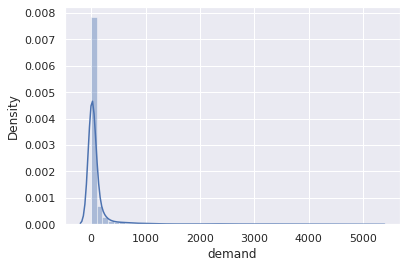

In [27]:
sns.distplot(grouped_data['demand'])

<p class="alert alert-block alert-success"> As this is a highly skewed data, we will try to transform this data using log transform 


/home/qamar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


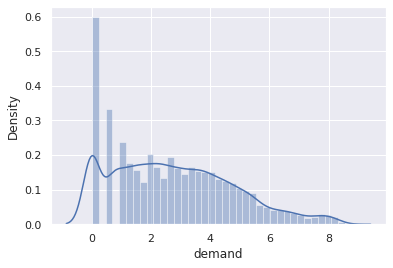

In [28]:
grouped_data['demand']=grouped_data['demand'].apply(lambda x:np.log(x))
sns.distplot(grouped_data['demand'])
plt.show()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

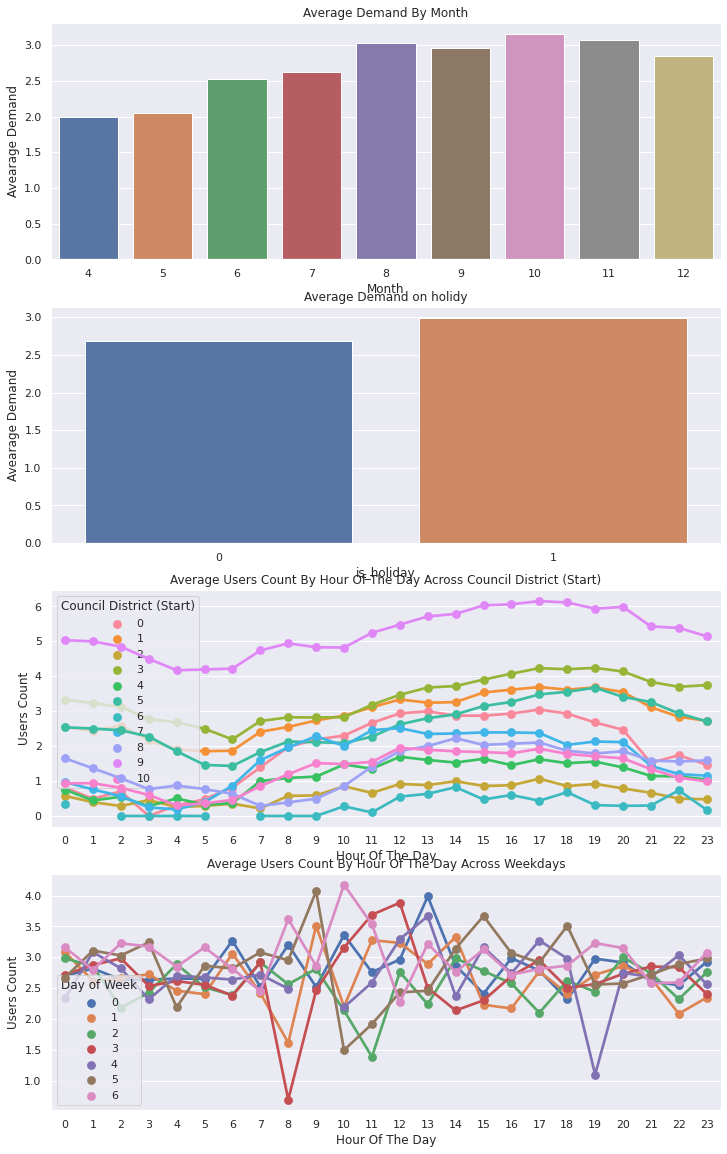

In [29]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)

sns.barplot(data=grouped_data,x="Month",y="demand",ax=ax1,ci=None)
ax1.set(xlabel='Month', ylabel='Avearage Demand',title="Average Demand By Month")

sns.barplot(data=grouped_data,x="is_holiday",y="demand",ax=ax2,ci=None)
ax2.set(xlabel='is_holiday', ylabel='Avearage Demand',title="Average Demand on holidy")


sns.pointplot(x=grouped_data["Hour"], y=grouped_data["demand"],hue=grouped_data["Council District (Start)"], data=grouped_data,ax=ax3,ci=None)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Council District (Start)",label='small')


sns.pointplot(x=df["Hour"], y=grouped_data["demand"],hue=grouped_data["Day of Week"], data=grouped_data,ax=ax4,ci=None)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='small')



<h6>Encoding Cyclical Features</h6>
<p>Many features commonly found in datasets are cyclical in nature. Like time: months, days, weekdays, hours, minutes, seconds etc. are all cyclical in nature. The problem is letting the algorithm know that features such as these occur in cycles.

 If we leave the hour feature unencoded, everything works in this case: 23−22=1. However, if we look at rows 11 and 12 we see the failure in our encoding: 0−23=−23. We need to change the encoding of the feature such that midnight and 11:00PM are the same distance apart as any other two hours.

Sol: A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.</p>

In [30]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [31]:
# encoding cyclical features
grouped_data = encode(grouped_data, 'Hour', 24)
grouped_data = encode(grouped_data, 'Day of Week', 7)
grouped_data = encode(grouped_data, 'Month', 12)

<h6>Feature Engineering on Categorical Data</h6>

In [32]:
grouped_data[['Year','Council District (Start)', 'is_peak time',
    'is_holiday']] = grouped_data[['Year','Council District (Start)',
                         'is_peak time','is_holiday']].astype('category')


In [33]:
cat = ['Year','Council District (Start)', 'is_peak time','is_holiday']
new_df= pd.get_dummies(grouped_data, columns=cat, drop_first=True)
new_df= new_df.drop(['Hour','Day of Week','Month'], axis=1)

new_df                     

,demand,Hour_sin,Hour_cos,Day of Week_sin,Day of Week_cos,Month_sin,Month_cos,Year_2020,Council District (Start)_1,Council District (Start)_2,Council District (Start)_3,Council District (Start)_4,Council District (Start)_5,Council District (Start)_6,Council District (Start)_7,Council District (Start)_8,Council District (Start)_9,Council District (Start)_10,is_holiday_1
0,0.000000,0.000000,1.000000,0.000000,1.00000,8.660254e-01,-0.5,0,0,0,1,0,0,0,0,0,0,0,0
1,2.708050,0.000000,1.000000,0.000000,1.00000,8.660254e-01,-0.5,0,0,0,0,0,0,0,0,0,1,0,0
2,2.079442,0.000000,1.000000,0.000000,1.00000,8.660254e-01,-0.5,1,1,0,0,0,0,0,0,0,0,0,0
3,2.890372,0.000000,1.000000,0.000000,1.00000,8.660254e-01,-0.5,1,0,0,1,0,0,0,0,0,0,0,0
4,2.708050,0.000000,1.000000,0.000000,1.00000,8.660254e-01,-0.5,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17287,2.708050,-0.258819,0.965926,-0.781831,0.62349,-2.449294e-16,1.0,0,0,0,0,0,1,0,0,0,0,0,1
17288,2.944439,-0.258819,0.965926,-0.781831,0.62349,-2.449294e-16,1.0,0,0,0,0,0,0,0,1,0,0,0,1
17289,0.000000,-0.258819,0.965926,-0.781831,0.62349,-2.449294e-16,1.0,0,0,0,0,0,0,0,0,1,0,0,1
17290,6.408529,-0.258819,0.965926,-0.781831,0.62349,-2.449294e-16,1.0,0,0,0,0,0,0,0,0,0,1,0,1


<h2>Feature Scaling  </h2>

In [34]:
# standardizing numerical variables
from sklearn.preprocessing import StandardScaler
cols = ['Hour_sin' ,'Hour_cos' ,'Day of Week_sin' ,'Day of Week_cos','Month_sin', 'Month_cos']
features = new_df[cols]

# standard Scaler
scaler = StandardScaler().fit(features.values)
new_df[cols] = scaler.transform(features.values)


<h2>ML Algorithm </h2>
<h6> We applied in this section the follwing : </h6>
    <ol>
    <li>hyperparameters tuning</li>
    <li>cross-validation</li>
    <li>hyperparameters tuning</li>
    <li>ensemble methods</li>
    <li>feature importance and interpretation</li>
    </ol>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

In [36]:
#train test split
X = new_df.drop(['demand'], axis=1)
y = new_df['demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from pprint import pprint

In [38]:
gbt = GradientBoostingRegressor(random_state = 42)
pprint(gbt.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 74, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]
# Method of selecting samples for training each tree
learning_rate = [0.01, 0.1]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
pprint(random_grid)

{'learning_rate': [0.01, 0.1],
 'max_depth': [5, 12, 20, 28, 35, 43, 51, 58, 66, 74, None],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100, 200, 300, 400, 500]}


In [40]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
gbt_random = RandomizedSearchCV(estimator = gbt, # the base model
                               param_distributions = random_grid, # grid of hyper parameters
                               n_iter = 10, # number of combinations of random hyper parameters to choose
                               cv = 3,# # 3-fold
                               verbose=2,  # print some logs while evaluating the different combinations
                               random_state=42,
                               n_jobs = 1) # use all cores in the machine to train (parallel)

In [41]:
X_train, X_test, y_train, y_test = \
    train_test_split(new_df.drop(columns=['demand']),
                     new_df['demand'],
                     test_size=0.2,
                     random_state=42)

In [42]:
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 5)
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 10)
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 15)
GradientBoostingRegressor(n_estimators = 10, min_samples_split= 20)
GradientBoostingRegressor(n_estimators = 100, min_samples_split= 10)

GradientBoostingRegressor(min_samples_split=10)

In [43]:
# Fit the random search model
gbt_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01, total=   9.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01, total=  10.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=7, max_depth=35, learning_rate=0.01, total=   9.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01, total=   6.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01, total=   6.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=58, learning_rate=0.01, total=   7.3s
[CV] n_estimators=200, min_samples_split=10

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 20, 28, 35, 43, 51,
                                                      58, 66, 74, None],
                                        'min_samples_leaf': [2, 4, 7],
                                        'min_samples_split': [5, 10, 16],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [44]:
best_gbt_model = gbt_random.best_estimator_
best_gbt_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=51, min_samples_leaf=7,
                          min_samples_split=10, n_estimators=500,
                          random_state=42)

In [45]:
gbt_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_depth': 51,
 'learning_rate': 0.01}

In [46]:
gbt_random.best_score_

0.9243313724967033

In [47]:
# r^2
best_gbt_model.score(X_test, y_test)

0.9337040217390596


<h3>Feature Importances</h3>
<h6>
Feature importance is a great way to get a general idea about which features the model is relying on most to make the prediction. This is a metric that simply sums up how many times each feature is split on.

We can see that the hour, month, day, and Council District (Start) when == 9, contribute on the prediction value</h6>

/home/qamar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

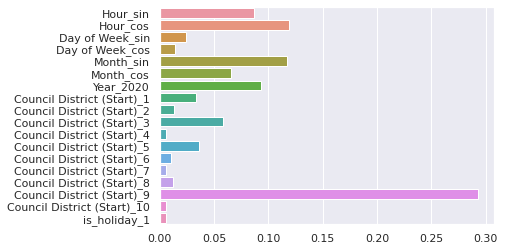

In [48]:
sns.barplot(best_gbt_model.feature_importances_, X_train.columns)